        Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum  \
0 2022-02-01   SLOT-1     26.004237  84.627119  29.713559  55.142373   
1 2022-02-01   SLOT-2     22.275167  68.733333  29.086667  56.901667   
2 2022-02-01   SLOT-3     20.499000  64.457627  28.500000  58.216667   
3 2022-02-01   SLOT-4     17.799500  56.350000  28.105000  57.933333   
4 2022-02-01   SLOT-5     11.849000  44.033333  27.641667  59.028333   

  Slot No..1  Hours          Time  Speed  Direction  
0       SLOT      1  01-02-2022-1   0.60     355.49  
1       SLOT      2  01-02-2022-2   0.63       2.86  
2       SLOT      3  01-02-2022-3   0.64       9.81  
3       SLOT      4  01-02-2022-4   0.66      18.00  
4       SLOT      5  01-02-2022-5   0.68      25.69  
(356, 6)
Loss functions:
* R-squared = -72.97711804570423
* RMSE = 42.833911570975374
* MAE = 41.34154178141733
        Date Slot No.  Alpha_Sensor     Winsen       Temp     RelHum  \
0 2022-02-01   SLOT-1     26.004237  84.627119  29.713559  

<ipython-input-1-b8c77f222c76>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]


Correlation:  0.33323147754411114


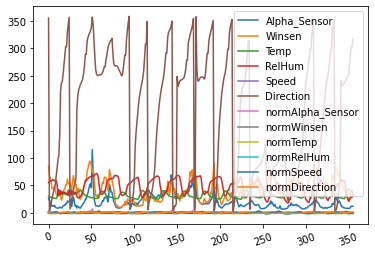

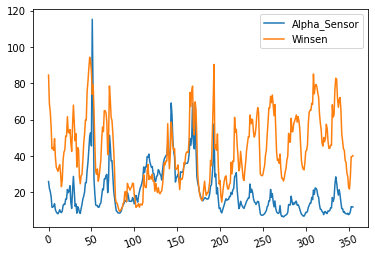

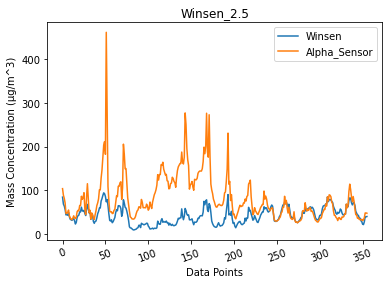

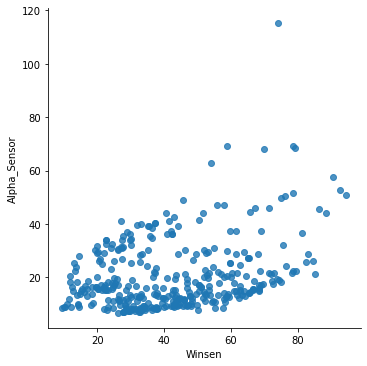

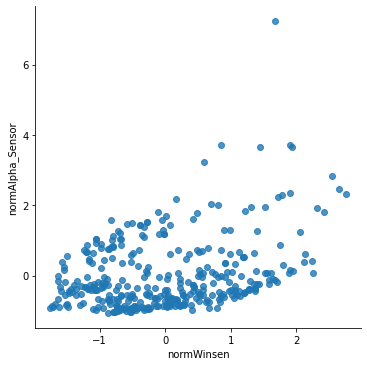

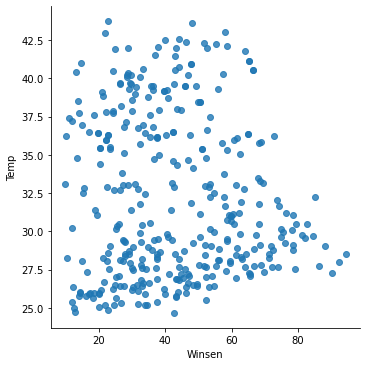

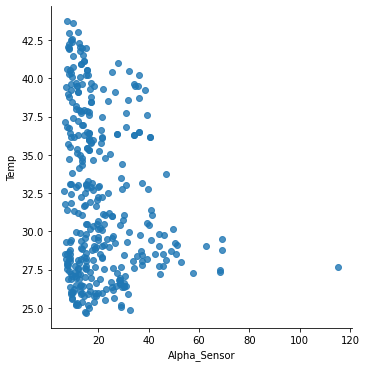

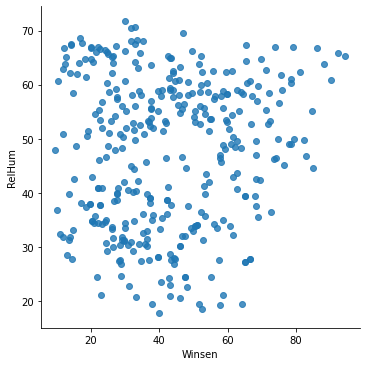

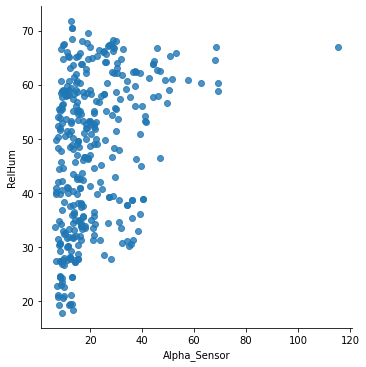

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for linear plot
import seaborn as sns # for scatter plot
from sklearn.model_selection import train_test_split
import datetime
import math

#%%
# Read sensor data
sensor = pd.read_excel("Winsen 2.5.xlsx", sheet_name = "60")
print(sensor.head())

# Build main dataset
df = pd.DataFrame({'Alpha_Sensor': sensor["Alpha_Sensor"], 'Winsen': sensor["Winsen"], 'Temp': sensor["Temp"], 'RelHum': sensor["RelHum"],
                  'Speed': sensor["Speed"], 'Direction': sensor["Direction"]})
print(df.shape)

# Split main dataset and build train and test datasets
X = df[['Winsen', 'Temp', 'RelHum', "Speed", "Direction"]]
Y = df['Alpha_Sensor']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, shuffle = False)

df_train = pd.DataFrame({'Alpha_Sensor': Y_train, 'Winsen': X_train["Winsen"], 'Temp': X_train["Temp"], 'RelHum': X_train["RelHum"],
                        'Speed': X_train["Speed"],'Direction': X_train["Direction"]})
df_test = pd.DataFrame({'Alpha_Sensor': Y_test, 'Winsen': X_test["Winsen"], 'Temp': X_test["Temp"], 'RelHum': X_test["RelHum"],
                       'Speed': X_test["Speed"], 'Direction': X_test["Direction"]})

#%%
# Loss functions definition
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    MSE = mean_squared_error(y_true, y_pred)
    print("* RMSE =", math.sqrt(MSE))
    print("* MAE =", mean_absolute_error(y_true, y_pred))
    
# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["Winsen"])

# %%
# Normalise sensor data
def normalize(col):
    μ = col.mean()
    σ = col.std()
    return (col - μ)/σ

df["normAlpha_Sensor"] = normalize(df["Alpha_Sensor"])
df["normWinsen"] = normalize(df["Winsen"])
df["normTemp"] = normalize(df["Temp"])
df["normRelHum"] = normalize(df["RelHum"])
df["normSpeed"] = normalize(df["Speed"])
df["normDirection"] = normalize(df["Direction"])

#%%
# Intro to Pandas
# Print first top lines from data
print(sensor.head(5))

#%%
# Print all data types
print(sensor.dtypes)

#%%
# Show data info summary
print(sensor.info())

#%%
# Select and print specific columns
Temp_Winsen = sensor[["Temp", "Winsen"]]
print(Temp_Winsen.head(5))

#%%
# Simple plot
df.plot()
plt.xticks(rotation = 20)

#%%
# Data observation
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time
df[["Alpha_Sensor", "Winsen"]].plot()
plt.xticks(rotation = 20)

# %%
# Plot the ozone (KOhms) and ozone reference data (μgr/m^3) as function of time - factor
Winsen_Alpha_Sensor_factor = df[["Winsen", "Alpha_Sensor"]]
Winsen_Alpha_Sensor_factor["Alpha_Sensor"] = 4*Winsen_Alpha_Sensor_factor["Alpha_Sensor"]
Winsen_Alpha_Sensor_factor.plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# %%
# Raw scatter plot
sns.lmplot(x = 'Winsen', y = 'Alpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Normalised scatter plot
sns.lmplot(x = 'normWinsen', y = 'normAlpha_Sensor', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# Temp with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'Temp', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Winsen
sns.lmplot(x = 'Winsen', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

# %%
# RelHum with respect to Alpha_Sensor
sns.lmplot(x = 'Alpha_Sensor', y = 'RelHum', data = df, fit_reg = False, line_kws = {'color': 'orange'}) 

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)

y = df["Winsen"].tolist()
y = pd.Series(y)

corr = y.corr(x)
print("Correlation: ", corr)

Intercept: 
 -112.37830616930101
Coefficients: 
 [ 0.23820113  2.26674379  1.11161281 -5.27911195  0.01906658]
Loss functions:
* R-squared = -134.3657353358199
* RMSE = 57.94198975298311
* MAE = 56.22449973653496
Intercept: 
 [21.35812326]
Coefficients: 
 [ 5.05329438 -0.08273169  3.79372234 -2.0927429   3.80946255]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Loss functions:
* R-squared = -4.284433360902195
* RMSE = 11.448227321598816
* MAE = 10.57977651241346
Correlation_MLR_Pred:  0.47871472325743114
Correlation_MLR_SGD_Pred:  0.6661158315326954


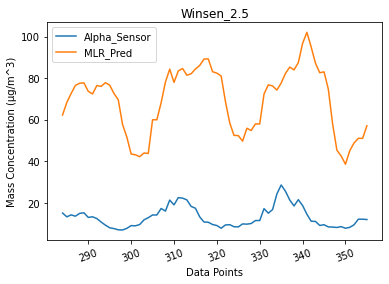

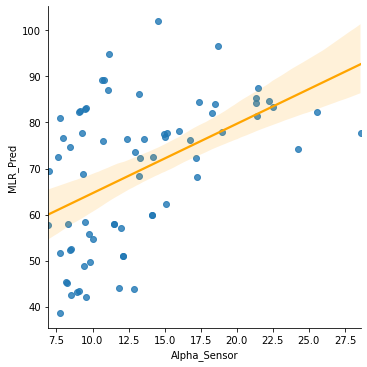

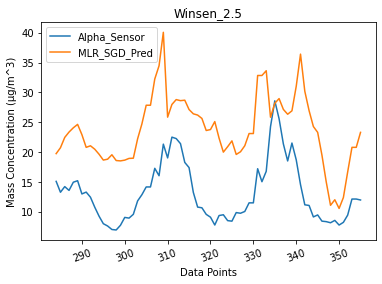

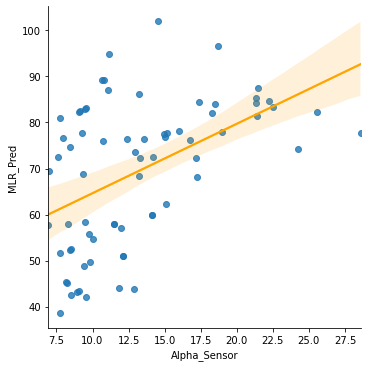

In [2]:
# %%
# Data calibration
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression

# Model
lr = LinearRegression()

# Fit
lr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

# Predict
df_test["MLR_Pred"] = lr.intercept_ + lr.coef_[0]*df_test["Winsen"] + lr.coef_[1]*df_test["Temp"] + lr.coef_[2]*df_test["RelHum"] + lr.coef_[2]*df_test["RelHum"] + lr.coef_[3]*df_test["Speed"] + lr.coef_[4]*df_test["Direction"]
type(df_test["MLR_Pred"])
# Plot linear
df_test[["Alpha_Sensor", "MLR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_Pred"])

# %%
# Multiple Linear Regression with Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Model
# sgdr = SGDRegressor(loss='squared_loss', alpha=.001, tol=1e-5)
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

# Normalize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit
sgdr.fit(X_train, Y_train)

# Get MLR coefficients
print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())

# Predict
# df_test["MLR_SGDR_Pred"] = sgdr.intercept_ + sgdr.coef_[0]*X_test[0] + sgdr.coef_[1]*X_test[1] - sgdr.coef_[2]*X_test[2]
df_test["MLR_SGD_Pred"] = sgdr.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "MLR_SGD_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'MLR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["MLR_SGD_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_MLR_Pred = df_test["MLR_Pred"].corr(x)
corr_MLR_SGD_Pred = df_test["MLR_SGD_Pred"].corr(x)
print("Correlation_MLR_Pred: ", corr_MLR_Pred)
print("Correlation_MLR_SGD_Pred: ", corr_MLR_SGD_Pred)

     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
284     15.076610  53.389831  33.116949  39.835593   0.52      52.28   
285     13.252167  53.576271  32.226667  43.561667   0.59      58.64   
286     14.198500  58.000000  31.670000  45.690000   0.66      65.56   
287     13.563833  59.183333  31.053333  48.050000   0.72      70.97   
288     14.936667  60.900000  30.481667  48.965000   0.75      74.38   
..            ...        ...        ...        ...    ...        ...   
351      8.209833  21.898305  42.976667  24.385000   0.85     266.29   
352      9.418833  28.383333  40.105000  27.653333   0.65     286.04   
353     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
354     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
355     11.956500  40.288136  36.293333  33.353333   0.50     317.54   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred  
284  62.222025     19.725873  17.471245  
285  68.284021     20.715868  18.860128  
286  72.5

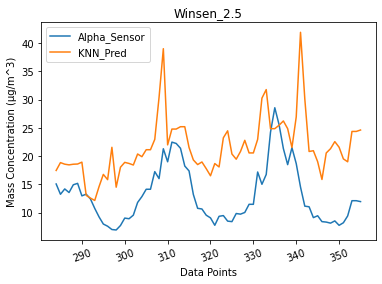

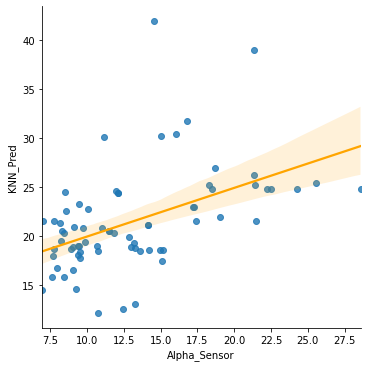

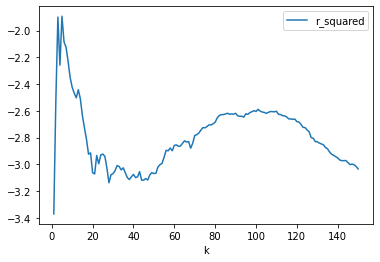

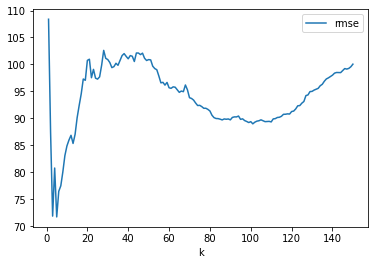

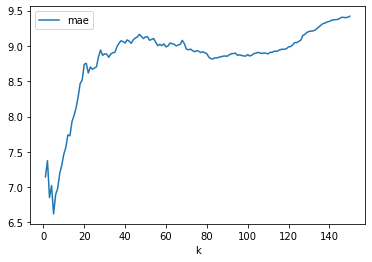

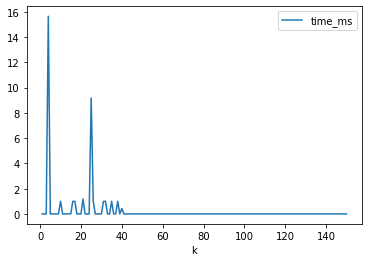

In [3]:
# %%
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Model
knn = KNeighborsRegressor(n_neighbors = 19)

# Fit
knn.fit(X_train, Y_train)

# Predict
df_test["KNN_Pred"] = knn.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "KNN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["KNN_Pred"])

# %%
# K-Nearest Neighbor stats vs. hyperparameters
def knn_stats():
    knn_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_neighbors = [*range(1, 151, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_neighbors:
        # Model
        knn = KNeighborsRegressor(n_neighbors=i)

        # Fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        knn.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # Predict
        knn_aux["KNN_Pred"] = knn.predict(X_test)

        # Loss
        r_squared.append(r2_score(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        rmse.append(mean_squared_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        mae.append(mean_absolute_error(knn_aux["Alpha_Sensor"], knn_aux["KNN_Pred"]))
        time_ms.append(execution_time)

    knn_stats = pd.DataFrame({'k': n_neighbors, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    knn_stats = knn_stats.set_index('k') # index column (X axis for the plots)
    print(knn_stats)

    # plot
    knn_stats[["r_squared"]].plot()
    knn_stats[["rmse"]].plot()
    knn_stats[["mae"]].plot()
    knn_stats[["time_ms"]].plot()

knn_stats()

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_KNN_Pred = df_test["KNN_Pred"].corr(x)
print("Correlation_KNN_Pred: ", corr_KNN_Pred)

     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
284     15.076610  53.389831  33.116949  39.835593   0.52      52.28   
285     13.252167  53.576271  32.226667  43.561667   0.59      58.64   
286     14.198500  58.000000  31.670000  45.690000   0.66      65.56   
287     13.563833  59.183333  31.053333  48.050000   0.72      70.97   
288     14.936667  60.900000  30.481667  48.965000   0.75      74.38   
..            ...        ...        ...        ...    ...        ...   
351      8.209833  21.898305  42.976667  24.385000   0.85     266.29   
352      9.418833  28.383333  40.105000  27.653333   0.65     286.04   
353     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
354     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
355     11.956500  40.288136  36.293333  33.353333   0.50     317.54   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred    RF_Pred  
284  62.222025     19.725873  17.471245  18.654086  
285  68.284021     20.715868 

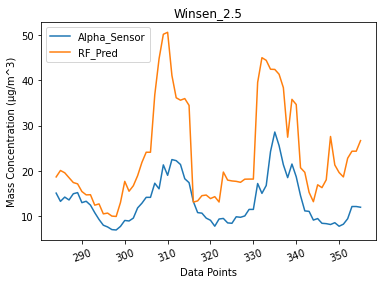

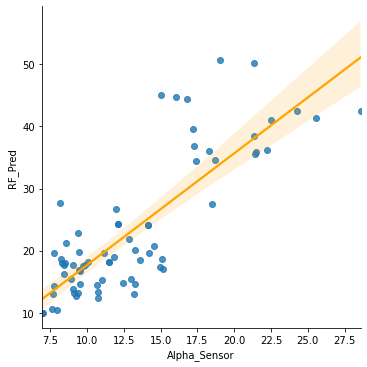

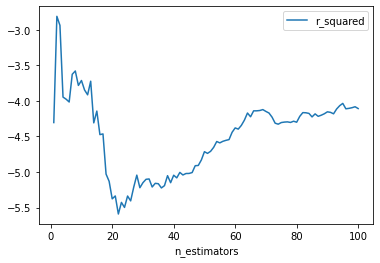

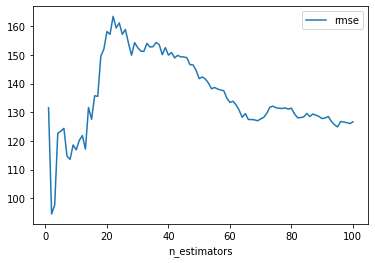

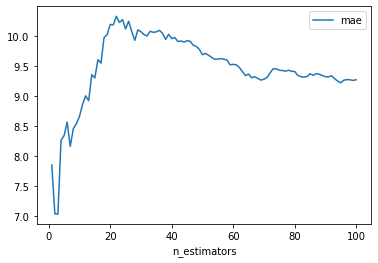

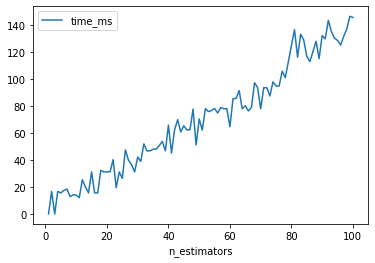

In [4]:
# %%
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Model
rf = RandomForestRegressor(n_estimators = 20 ,random_state = 0)

# Fit
rf.fit(X_train, Y_train)

# Predict
df_test["RF_Pred"] = rf.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "RF_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["RF_Pred"])

# RF feature importances
print('Feature importances:\n', list(zip(X.columns, rf.feature_importances_)))


# %%
# Random Forest stats vs. hyperparameters
def rf_stats():
    rf_aux = pd.DataFrame({'Alpha_Sensor': Y_test})

    n_estimators = [*range(1, 101, 1)]
    r_squared = []
    rmse = []
    mae = []
    time_ms = []

    for i in n_estimators:
        rf=RandomForestRegressor(n_estimators=i,random_state=0)

        # fit
        start_time = float(datetime.datetime.now().strftime('%S.%f'))
        rf.fit(X_train, Y_train)
        end_time = float(datetime.datetime.now().strftime('%S.%f'))
        execution_time = (end_time - start_time) * 1000

        # predict
        rf_aux["RF_Pred"] = rf.predict(X_test)
        x = df["Alpha_Sensor"].tolist()
        x = pd.Series(x)
        corr = rf_aux["RF_Pred"].corr(x)
        print("Correlation: ", corr)

        # Loss
        r_squared.append(r2_score(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        rmse.append(mean_squared_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        mae.append(mean_absolute_error(rf_aux["Alpha_Sensor"], rf_aux["RF_Pred"]))
        time_ms.append(execution_time)

    rf_stats = pd.DataFrame({'n_estimators': n_estimators, 'r_squared': r_squared, 'rmse': rmse, 'mae': mae, 'time_ms': time_ms})
    rf_stats = rf_stats.set_index('n_estimators') # index column (X axis for the plots)
    print(rf_stats)

    # plot
    rf_stats[["r_squared"]].plot()
    rf_stats[["rmse"]].plot()
    rf_stats[["mae"]].plot()
    rf_stats[["time_ms"]].plot()

rf_stats()
x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["RF_Pred"].corr(x)
print("Correlation is : ", corr)

Dot params {'alpha': 150, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = -4.271838012661603
* RMSE = 11.434575864222149
* MAE = 10.833301486763382
Correlation:  0.6785938462094442


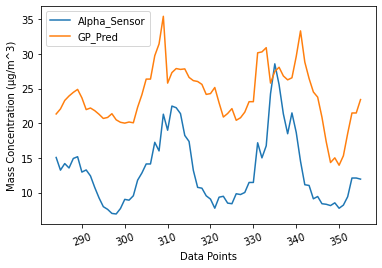

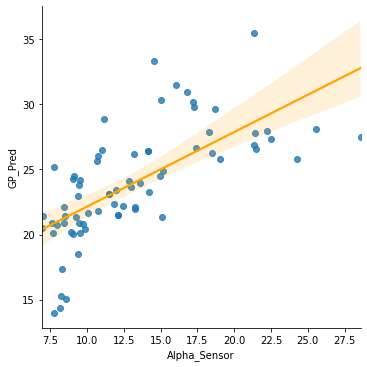

In [5]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, WhiteKernel

# Kernels definition
dpwh = DotProduct() + WhiteKernel()

# Models
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 150, random_state = 0)

# Fit
gp_dpwh.fit(X_train, Y_train)

# Predict
df_test["GP_Pred"] = gp_dpwh.predict(X_test)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["Alpha_Sensor", "GP_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.xticks(rotation = 20)

# Plot regression 
sns.lmplot(x = 'Alpha_Sensor', y = 'GP_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["GP_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr = df_test["GP_Pred"].corr(x)
print("Correlation: ", corr)

Loss functions:
* R-squared = -7.900643054895378
* RMSE = 14.857636331233648
* MAE = 11.025550141948811
Loss functions:
* R-squared = -0.8432005655823809
* RMSE = 6.761224073181133
* MAE = 5.911195316134172
Loss functions:
* R-squared = -2.039577678230324
* RMSE = 8.682517250612896
* MAE = 7.488044832991722
Correlation_corr_lin:  0.6608908652575499


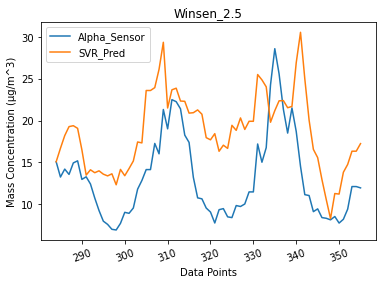

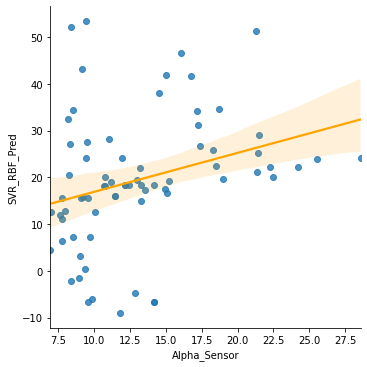

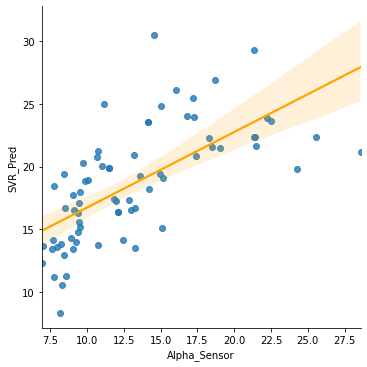

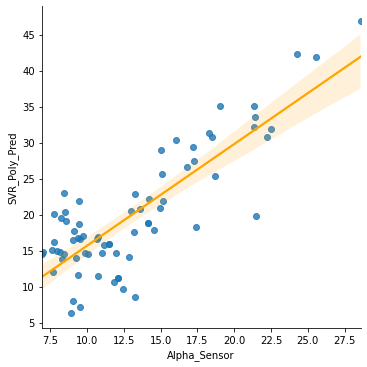

In [6]:
# %%
# Support Vector Regression
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 3)

# Fit
svr_rbf.fit(X_train, Y_train)
svr_lin.fit(X_train, Y_train)
svr_poly.fit(X_train, Y_train)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test)
df_test["SVR_Pred"] = svr_lin.predict(X_test)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test)

# Plot linear
df_test[["Alpha_Sensor", "SVR_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 
sns.lmplot(x = 'Alpha_Sensor', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Pred"])
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["SVR_Poly_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_lin = df_test["SVR_Pred"].corr(x)
print("Correlation_corr_lin: ", corr_lin)

C:\Users\Swadesh Choudhary\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


     Alpha_Sensor     Winsen       Temp     RelHum  Speed  Direction  \
284     15.076610  53.389831  33.116949  39.835593   0.52      52.28   
285     13.252167  53.576271  32.226667  43.561667   0.59      58.64   
286     14.198500  58.000000  31.670000  45.690000   0.66      65.56   
287     13.563833  59.183333  31.053333  48.050000   0.72      70.97   
288     14.936667  60.900000  30.481667  48.965000   0.75      74.38   
..            ...        ...        ...        ...    ...        ...   
351      8.209833  21.898305  42.976667  24.385000   0.85     266.29   
352      9.418833  28.383333  40.105000  27.653333   0.65     286.04   
353     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
354     12.115000  39.666667  39.138333  28.118333   0.58     302.83   
355     11.956500  40.288136  36.293333  33.353333   0.50     317.54   

      MLR_Pred  MLR_SGD_Pred   KNN_Pred    RF_Pred    GP_Pred  SVR_RBF_Pred  \
284  62.222025     19.725873  17.471245  18.654086  21.3

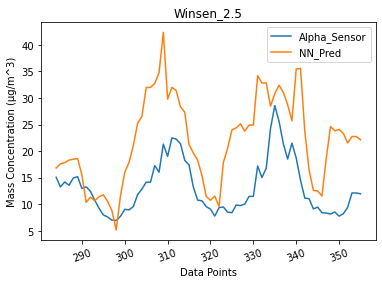

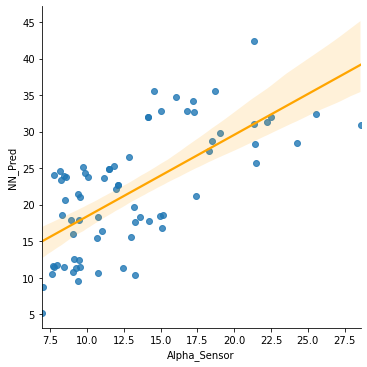

In [7]:
# %%
# Neural Network - SKL
from sklearn.neural_network import MLPRegressor

# Model
mlp = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', solver='adam', max_iter=1000)

# Fit
mlp.fit(X_train,Y_train)

# Predict
# predict_train = mlp.predict(X_train)
df_test["NN_Pred"] = mlp.predict(X_test)
print(df_test)

# Plot linear
df_test[["Alpha_Sensor", "NN_Pred"]].plot()
plt.xlabel("Data Points")
plt.ylabel("Mass Concentration (μg/m^3)")
plt.title("Winsen_2.5")
plt.xticks(rotation=20)

# Plot regression
sns.lmplot(x = 'Alpha_Sensor', y = 'NN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'}) 

# Loss
loss_functions(y_true = df_test["Alpha_Sensor"], y_pred = df_test["NN_Pred"])

x = df["Alpha_Sensor"].tolist()
x = pd.Series(x)
corr_NN = df_test["NN_Pred"].corr(x)
print("Correlation_NN: ", corr_NN)